<a href="https://colab.research.google.com/github/mayur7garg/66DaysOfData/blob/main/Day%2023/HPF_and_LPF_using_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# High Pass and Low Pass filters using Fast Fourier transform

**References**:
- [Open CV Fourier Transform](https://docs.opencv.org/4.5.2/de/dbc/tutorial_py_fourier_transform.html)
- [Image denoising by FFT](http://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_fft_image_denoise.html)
- [Image Processing with Python — Application of Fourier Transformation](https://towardsdatascience.com/image-processing-with-python-application-of-fourier-transformation-5a8584dc175b)
- [Fast Fourier Transform](https://towardsdatascience.com/fast-fourier-transform-937926e591cb)
- [Introduction to Fourier analysis of time series](https://fischerbach.medium.com/introduction-to-fourier-analysis-of-time-series-42151703524a)

## Imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Load the image and generate its magnitude spectrum using FFT

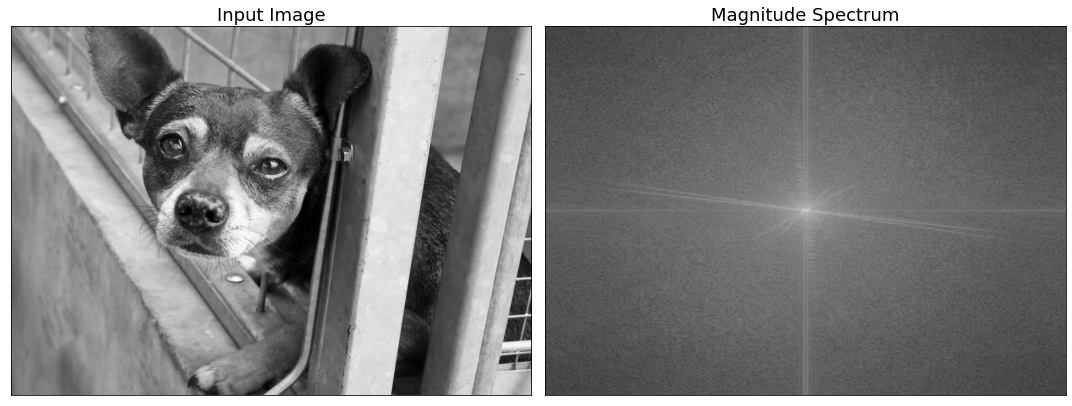

In [2]:
img = cv2.imread(r'..\Data\Images\Dog.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.figure(figsize = (15, 8))

plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image', fontsize = 18)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum', fontsize = 18)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

## Apply a high pass filter to detect higher frequencies in the image which correspond to edges and noise

In [3]:
HPF_THRESH = 10
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
hpf_fshift = fshift.copy()

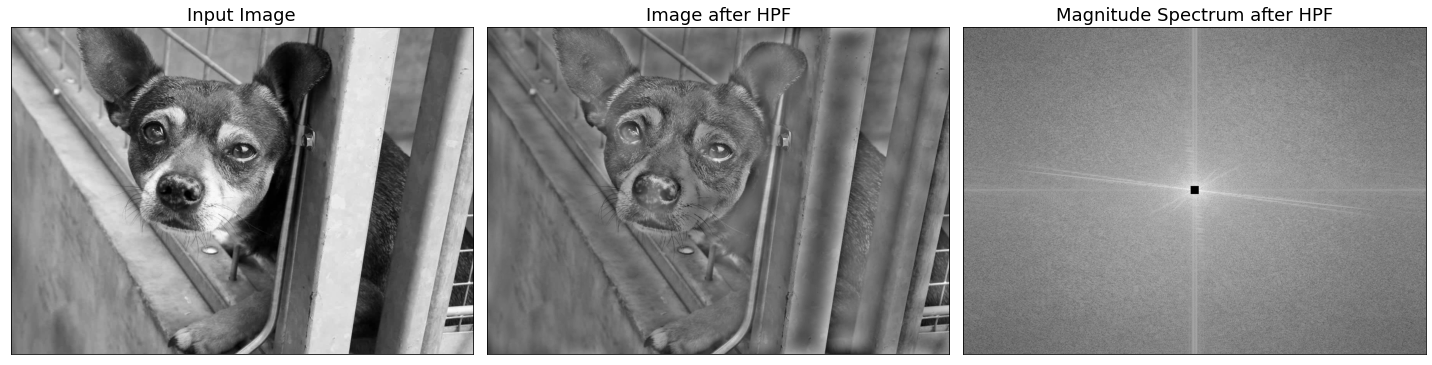

In [4]:
hpf_fshift[crow - HPF_THRESH : crow + HPF_THRESH + 1, ccol - HPF_THRESH : ccol + HPF_THRESH + 1] = 1
hpf_magnitude_spectrum = 20 * np.log(np.abs(hpf_fshift))
f_ishift = np.fft.ifftshift(hpf_fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

plt.figure(figsize = (20, 7))

plt.subplot(131)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image', fontsize = 18)
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF', fontsize = 18)
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(hpf_magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum after HPF', fontsize = 18)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

## Apply a low pass filter to only allow low frequencies which leads to less noise and smoothed out edges

In [5]:
LPF_THRESH_X = 525
LPF_THRESH_Y = 375
lpf_fshift = fshift.copy()

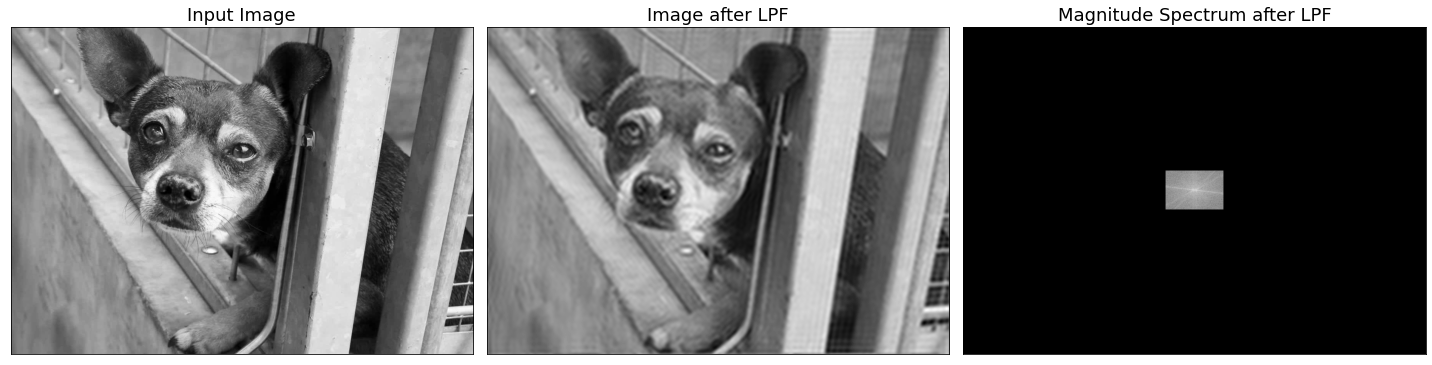

In [6]:
lpf_fshift[: LPF_THRESH_Y, : ] = 1
lpf_fshift[-LPF_THRESH_Y :, : ] = 1
lpf_fshift[:, : LPF_THRESH_X] = 1
lpf_fshift[:, -LPF_THRESH_X :] = 1

lpf_magnitude_spectrum = 20 * np.log(np.abs(lpf_fshift))
f_ishift = np.fft.ifftshift(lpf_fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

plt.figure(figsize = (20, 7))

plt.subplot(131)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image', fontsize = 18)
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(img_back, cmap = 'gray')
plt.title('Image after LPF', fontsize = 18)
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(lpf_magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum after LPF', fontsize = 18)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()